<a href="https://colab.research.google.com/github/savioramos1/Portfolio_DataScience/blob/main/Detec%C3%A7%C3%A3o_do_Cancer_de_Mama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção do Câncer de Mama com Machine Learning

Com o advento da tecnologia, a utilização de técnicas como Machine learning na área da saúde vem crescendo cada vez mais, e contribuído para diagnósticos mais rápidos e precisos.

[Segundo Instituto Oncoguia](http://www.oncoguia.org.br/conteudo/estatisticas-para-cancer-de-mama/6562/34/), o câncer de mama é o mais incidente entre as mulheres. Em 2018, ocorreram 2,1 milhões de casos novos, o equivalente a 11,6% de todos os cânceres estimados. Esse valor corresponde a um risco estimado de 55,2/100 mil. O Instituto Nacional de Câncer (INCA) estima que para cada ano do triênio 2020/2022, sejam diagnosticados no Brasil 66.280 novos casos de câncer de mama, com um risco estimado de 61,61 casos a cada 100 mil mulheres.

![Câncer de Mama](https://www.vanidades.com/__export/1633436954362/sites/vanidades/img/historico/2019/10/cancer8jpg.jpg_172596871.jpg)

[De acordo com a máteria da *CURA Medicina Diagnóstica*](https://cura.com.br/diagnostico-precoce-do-cancer-de-mama-e-ainda-a-melhor-maneira-de-salvar-vidas/), quando o diagnóstico é feito precocemente a chances de cura da doença pode chegar a 95%. Com isso, faz-se necessário aplicação de análise preditiva como Machine Learning, que tem como objetivo aprimorar a velocidade e precisão que é feito os diagnósticos.

Nesse projeto é feito um modelo preditivo capaz de detectar câncer de mama. 

#Importando os Dados

Para a construção do modelo de Machine Learning foi usado o banco de dados Wisconsin, disponibilizado no [Repositório de Machine Learning da UCI](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)).

O conjunto de dados que será utilizado nesta análise também está disponível para download no [kaggle](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data). Além disso, o dataset consiste em um arquivo csv contendo 569 entradas e 32 colunas onde as observações foram obtidas por meio da aspiração com agulha fina de células da mama. Salienta-se que a variável alvo pode ser classificada em benigna ou maligna.

In [19]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from xgboost import XGBClassifier


import warnings
warnings.filterwarnings('ignore')


# Importar o arquivo
file_path = "https://www.dropbox.com/s/sy69mk720ymol5p/data.csv?dl=1"


# Importar o arquivo para um DataFrame
cancer = pd.read_csv(file_path)

#Tratamento dos dados

Depois de importar o dataset, iremos examinar as dimensões do dataframe e as primeiras entradas. Isso possibilitará criar uma consciência situacional inicial a respeito do formato de entrada e da estrutura geral dos dados.

Informações sobre os atributos:


*   A coluna `id` representa o número de identificação.
*   A coluna `diagnosis` é a variável alvo(o que quremos prever)
    *   **M** - *Maligno*
    *   **B** - *Benigno*
*   `Radius` representa a média das distâncias do centro aos pontos do perímetro
*   `Texture` representa o desvio padrão dos valores da escala de cinza
*   `Perimeter` (Perímetro)
*   `Area` (Área)
*   `Smoothness_mean` representa a variação local nos comprimentos do raio
*   `Compactness` representa o (perímetro ^2 / area - 1.0)
*   `Concavity` representa a severidade das porções côncavas do contorno
*   `Concave points` representa o número de porções côncavas do contorno
*   `fractal_dimension` representa a aproximação da costa - 1
*   `symmetry`


Vamos examinar as primeiras entradas do dataframe, afim de adquirimos uma noção inicial sobre o tipo de formato, exemplos de entrada e formulação das hipóteses iniciais do processo investigativo.

In [20]:
#Imprimir as primeiras linhas do datafreme
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Nota-se que há a coluna *Unnamed: 32* apresenta erro e não acrestenta nada relevante para o projeto, com isso, podemos deletar.

In [21]:
#Deletar coluna 
cancer = cancer.drop(['id', 'Unnamed: 32'], axis = 'columns')

Vamos verificar a dimensão do dataset e também o tipo das variáveis. Esse processo é importante porque podemos verificar se há alguma variável em formato que não é adequado, como uma coluna em string quando deveria ser int.

In [22]:
#Tamanho do dataset 
print(f'Nº de Linhas: {cancer.shape[0]}')
print(f'Nº de Colunas: {cancer.shape[1]}')

#Tipo das variáveis
cancer.dtypes.sort_values()

Nº de Linhas: 569
Nº de Colunas: 31


smoothness_se              float64
concave points_worst       float64
concavity_worst            float64
compactness_worst          float64
smoothness_worst           float64
area_worst                 float64
perimeter_worst            float64
texture_worst              float64
radius_worst               float64
fractal_dimension_se       float64
symmetry_se                float64
concave points_se          float64
concavity_se               float64
compactness_se             float64
symmetry_worst             float64
fractal_dimension_worst    float64
perimeter_se               float64
texture_se                 float64
radius_se                  float64
fractal_dimension_mean     float64
symmetry_mean              float64
concave points_mean        float64
concavity_mean             float64
compactness_mean           float64
smoothness_mean            float64
area_mean                  float64
perimeter_mean             float64
texture_mean               float64
radius_mean         

Agora será feito a verificação da presença de valores ausentes no dataset, essa tarefa é extremamente importante, pois isso está diretamente relacionado com a qualidade do dataset.

In [23]:
cancer.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Como não foi constatado valores ausentes no conjunto de dados, e o mesmo não apresenta nenhum outro problema, podemos seguir para proxima etapa.

#Análise Exploratória

Primeiramente será feito a verificação do balanceamento do dataset de acordo com a variável alvo `diagnosis`.

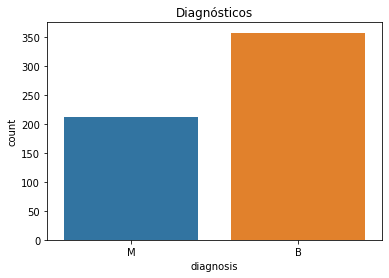

Diagnósticos:
B    357
M    212
Name: diagnosis, dtype: int64


In [24]:
## plotar o gráfico de barras com os diagnósticos
fig, ax = plt.subplots()
sns.countplot('diagnosis', data=cancer)
ax.set_title("Diagnósticos")
plt.show()

print("Diagnósticos:")
print(cancer['diagnosis'].value_counts())

Observa-se que há um pequeno desbalaceamento de valores. Como a coluna `diagnosis` possui 569 registro, o ideal seria ter uma média de 284 para Benigno e 284 para Maligno.

Por meio do método describe, é possível ver um resumo estatístico das variáveis numéricas. 

In [25]:
cancer.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Com um gráfico heatmap, podemos visualizar a força da correlação entre as variáveis.

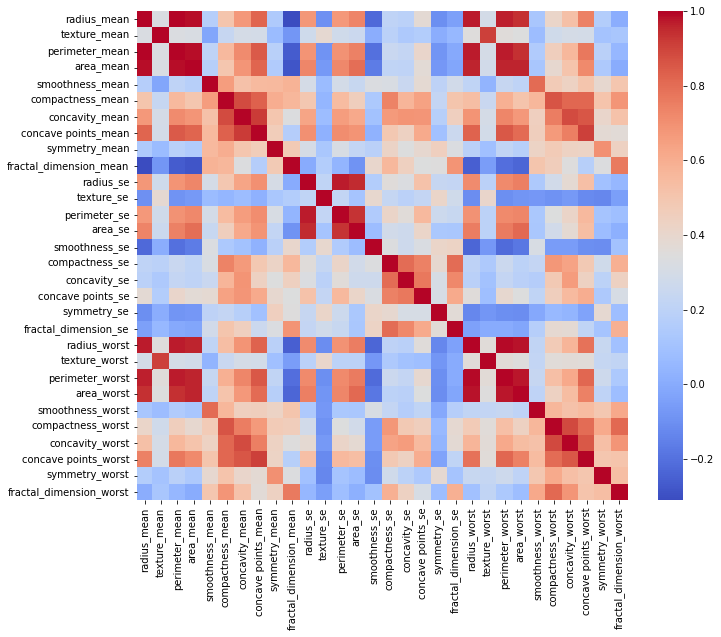

In [26]:
corr = cancer.corr()

#plotar gráfico heatmap
fig, ax = plt.subplots(figsize= (11,9))
sns.heatmap(corr, cmap = 'coolwarm')
plt.show()

Nota-se que diversas variáveis possuem correlação positiva.

#Preparação dos dados

Nessa etapa, iremos converter a variável alvo `diagnosis` que é categórica para númerica, onde **M** representa os tumores *malignos* e **B** os *benignos*. Usando `LabelEncoder` somos capazes de converter variáveis categóricas em numéricas e alimentar o modelo adequadamente. Também, vamos utilizar o `StardardScaler`, que vem junto com `sklearn.preprocessing`, para padronizar nossos dados numéricos. Além disso, o dataset será dividido em dados de treino e teste usando o `train_test_split` que se encontra em `sklearn.model_selection`.

In [27]:
# separar as variáveis independentes da variável alvo
X = cancer.drop(['diagnosis'], axis=1)
y = cancer['diagnosis']

# padronizar as colunas numéricas
X = StandardScaler().fit_transform(X)

# label encoder na variável alvo
y = LabelEncoder().fit_transform(y)

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Modelo de Machine Learning

O modelo de machine learning no projeto em questão, consiste em classificar corretamente um tumor entre benigno e maligno, ou seja, é necessário que o modelo de Machine Learning dê uma classificação ao ser alimentado com diversas variáveis independentes. Vamos utilizar dois algoritmos de Machine Learning e analisar o desempenho de ambos:
*   XGBoost;
*   Random Forest.







##XGBoost

O *XGBoost* ou *Extreme Gradient Boosting* é um algoritmo baseado em *Decision Trees* (árvores de decisão) com *Gradient Boosting* (aumento de gradiente). O Aumento de gradiente significa que o algoritmo usa o algoritmo G*radient Descent* para minimizar a perda (loss) enquanto novos modelos vão sendo adicionados. É um algoritmo extremamente flexível, uma vez que possui um grande número de hiperparâmetros passíveis de aperfeiçoamento. Para mais informações, [clique aqui](https://sigmoidal.ai/xgboost-aprenda-algoritmo-de-machine-learning-em-python/).

In [28]:
# Construindo o Modelo
xgb1 = XGBClassifier()

# Treinando o Modelo
xbg1 = xgb1.fit(X_train, y_train)

###Avaliando o modelo

Para avaliar o modelo, será utilizado a função `classification_report` para ver ver o desempenho do modelo sobre as métricas de *Acurácia*, *precisão*, *recall*, *f1-score* e *support*.

In [29]:
#Instalar pacote para plotar matriz  de confusão
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Classification metrics: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       111
           1       0.97      0.95      0.96        60

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

Acurária: 0.9708



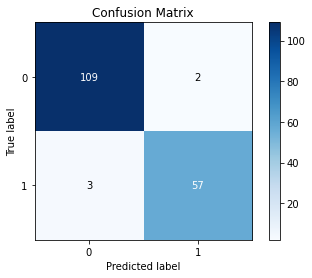

In [34]:
#Importar pacote para imprimier matriz de confusão
import scikitplot as skplt

# Passando dados de teste para o modelo
y_predict = xbg1.predict(X_test)

#imprimir acuracia e classification metrics
print('Classification metrics: \n', classification_report(y_test, y_predict))
print('Acurária: {:.4f}\n'.format(accuracy_score(y_test, y_predict)))

##print('Confusion Matrix: \n', confusion_matrix(y_val, y_predict))
skplt.metrics.plot_confusion_matrix(y_test, y_predict);

Observa-se na classification metrics que o modelo apresentou bons valores para as métricas que foi considerada. Entretanto, nem sempre uma ótima acurácia vai determinar se o modelo está realmente bom. É importante analisar a matriz de confusão para entender o comportamento dos números verdadeiro positvos, negativos e falso positivos, negativos.

Quando se trata de detectar câncer, queremos maximizar o número de verdadeiros positivos e minimizar o número de falsos negativos. Exemplificando, imagine que seu modelo é capaz de detectar com 99,999% de acurácia sempre que um paciente não apresenta um tumor maligno, mas apenas 85% de acurácia quando prevê que o mesmo paciente apresentar esse tumor maligno.

##Random Forest

O *Random Forest* ou *Floresta aleatória*, é um algoritmo que cria de forma aleatória várias *Árvores de Decisão* (*Decision Trees*) e combina o resultado de todas elas para chegar no resultado final, em uma espécie de votação. Para mais informação desse algoritmo, [clique aqui](https://icmcjunior.com.br/random-forest/).

In [35]:
# Construindo o Modelo
model = RandomForestClassifier()

#Treinando o Modelo
model = model.fit(X_train, y_train)


###Avaliando o modelo

Classification metrics: 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       111
           1       0.91      0.98      0.94        60

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Acurária: 0.9591



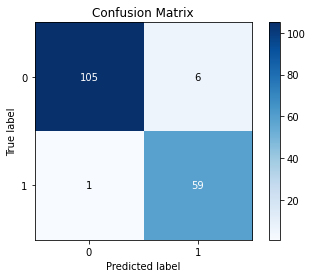

In [36]:
# Passando os dados de teste para o modelo
y_predict = model.predict(X_test)

#imprimir acuracia e classification metrics
print('Classification metrics: \n', classification_report(y_test, y_predict))
print('Acurária: {:.4f}\n'.format(accuracy_score(y_test, y_predict)))

skplt.metrics.plot_confusion_matrix(y_test, y_predict);

O algoritmo Random Forest apresentou bom desempenho nas métricas que foi considerada, tendo alcançado uma acurácia superiro a 95%.

#Conclusão

Nesse projeto, havia uma coluna que apresentava erro e foi deletado e também não teve valores ausentes, com isso, não foi necessário fazer uma limpeza dos dados. Contudo, a variável alvo estava um pouco desbalanceado.

Os modelos utilizados apresentam bom desempenho na deteccção de câncer de mama, tendo ambos com acurária acima de 95%.

O algoritmo XGBoost foi capaz de atingir acurácia de 97% e lidou muito bem com ambas as classes.

A Inteligência Artificial está cada vez mais sendo aplicada em diversas áreas do mercado, principalmente na saúde. O uso de Machine Learning para deteccção de câncer de mama ajudam cada vez mais os médicos a diagnosticarem seus pacientes, aumentando drásticamente as chances dos tratamentos convencionais e diminuindo a taxa de mortaldiade.